In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
import warnings
from sklearn.model_selection import train_test_split

os.chdir("/Users/kkkatheriine/Desktop/INSY 695/Group_Project")
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

np.random.seed(2025)

data = pd.read_csv("Original_Data.csv")

## 1. Data Structure Overview

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [3]:
data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
data.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [5]:
data.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [6]:
data["Gender"].value_counts()

Gender
F    71840
M    38687
Name: count, dtype: int64

In [7]:
data["Neighbourhood"].value_counts()

Neighbourhood
JARDIM CAMBURI                 7717
MARIA ORTIZ                    5805
RESISTÊNCIA                    4431
JARDIM DA PENHA                3877
ITARARÉ                        3514
CENTRO                         3334
TABUAZEIRO                     3132
SANTA MARTHA                   3131
JESUS DE NAZARETH              2853
BONFIM                         2773
SANTO ANTÔNIO                  2746
SANTO ANDRÉ                    2571
CARATOÍRA                      2565
JABOUR                         2509
SÃO PEDRO                      2448
ILHA DO PRÍNCIPE               2266
NOVA PALESTINA                 2264
ANDORINHAS                     2262
DA PENHA                       2217
ROMÃO                          2215
GURIGICA                       2018
SÃO JOSÉ                       1977
BELA VISTA                     1907
MARUÍPE                        1902
FORTE SÃO JOÃO                 1889
ILHA DE SANTA MARIA            1885
SÃO CRISTÓVÃO                  1836
REDENÇÃO      

In [8]:
data["No-show"].value_counts()

No-show
No     88208
Yes    22319
Name: count, dtype: int64

**Identified Issue: Imbalanced Data**

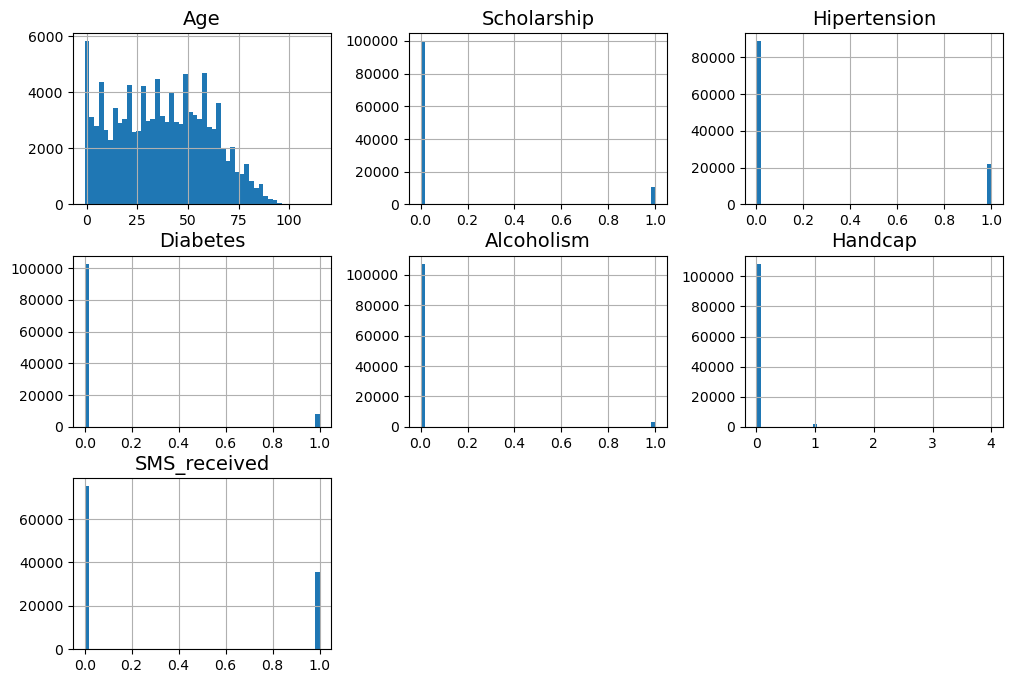

In [9]:
# Configure Matplotlib settings
plt.rc("font", size=14)
plt.rc("axes", labelsize=14, titlesize=14)
plt.rc("legend", fontsize=14)
plt.rc("xtick", labelsize=10)
plt.rc("ytick", labelsize=10)

# Drop non-informative ID columns and plot histograms
numerical_cols = data.select_dtypes(['int64', 'float64']).drop(columns=['PatientId', 'AppointmentID'], errors='ignore')
numerical_cols.hist(bins=50, figsize=(12, 8))
plt.show()

**Identified Issue: Imbalanced Data & Age is Skewed**

## 2. Creating a Hold-Out Test Set

In [10]:
train, test = train_test_split(data, test_size=0.2, random_state=2025)

In [11]:
# train.to_csv("Original_Data_train.csv")
# test.to_csv("Original_Data_test.csv")

## 3. EDA on Train Set

### 3.1 Preliminary Feature Engineering

In [12]:
train["Gender_num"] = train["Gender"].map({"F": 1, "M": 0})
train["No_show_num"] = train["No-show"].map({"Yes": 1, "No": 0})

### 3.2 Correlations

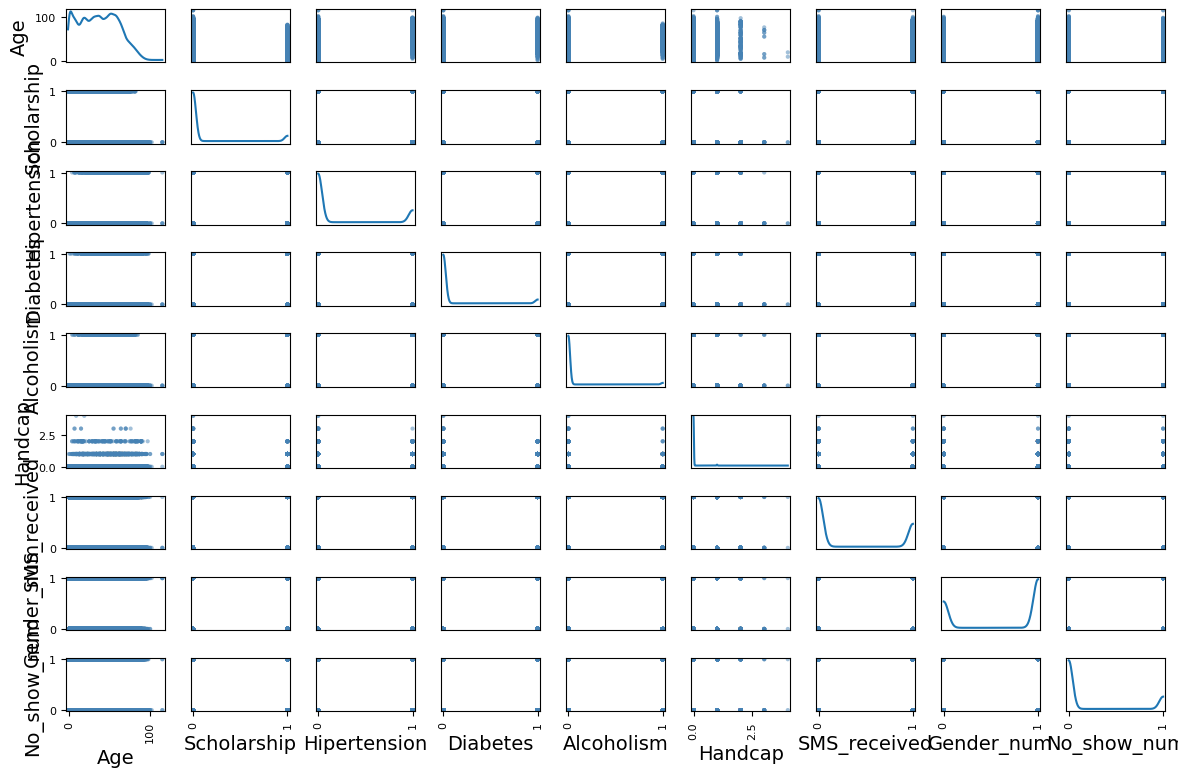

In [13]:
attributes = train.select_dtypes(['int64', 'float64']).drop(columns = ['PatientId', 'AppointmentID'], errors = "ignore")

scatter_matrix(attributes, figsize = (12,8), alpha = 0.5, diagonal="kde", color = "steelblue")

plt.tight_layout()
plt.show()

In [14]:
corr_matrix = attributes.corr(numeric_only= True)
corr_matrix["No_show_num"].sort_values(ascending = False)

No_show_num     1.000000
SMS_received    0.127649
Scholarship     0.032187
Gender_num      0.003690
Alcoholism      0.002088
Handcap        -0.007279
Diabetes       -0.016102
Hipertension   -0.035940
Age            -0.059394
Name: No_show_num, dtype: float64

**Looks like our assumptions for recieving SMS has an impact on No show number is valid**

### 3.3 Transformation for Skewed Age

Skewness of Age: 0.12332243151166165


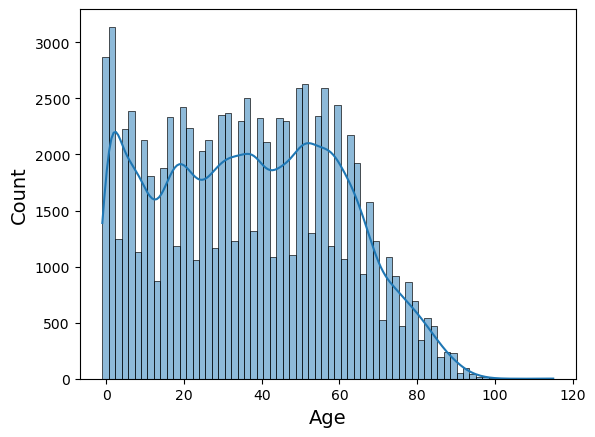

In [ ]:
print("Skewness of Age:", train["Age"].skew())
sns.histplot(train["Age"], kde=True) # Add kernal density estimate (KDE)
plt.show()

Skewness of 0.1233 means that the Age distribution is very close to normal, we don't need additional transformations